## Разведочный анализ данных (Exploratory Data Analysis, EDA) с использованием matplotlib

### Датасет

Для лабораторной работы был выбран датасет [Online Payments Fraud Detection Dataset](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data), где собраны данные по онлайн транзакциям с пометкой это была ли транзакция мошеннической (isFraud) или нет.

Описание столбцов из описания датасета на Kaggle:
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

Этот датасет я сейчас использую для проекта ML-модели обнаружения chargeback мошенничества для малого и среднего бизнесов.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./data/PS_20174392719_1491204439457_log.csv')

## 1. Общая характеристика данных

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


### 1.1. Количество строк и столбцов

In [24]:
print(f"Количество строк: {df.shape[0]:,}")
print(f"Количество столбцов: {df.shape[1]}")

Количество строк: 6,362,620
Количество столбцов: 11


### 1.2. Типы признаков

In [25]:
# Разделение признаков на числовые и категориальные
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:")
for col in numerical_cols:
    print(f"  - {col}: {df[col].dtype}")

print("\nКатегориальные признаки:")
for col in categorical_cols:
    print(f"  - {col}: {df[col].dtype}")

print(f"\nВсего числовых признаков: {len(numerical_cols)}")
print(f"Всего категориальных признаков: {len(categorical_cols)}")


Числовые признаки:
  - step: int64
  - amount: float64
  - oldbalanceOrg: float64
  - newbalanceOrig: float64
  - oldbalanceDest: float64
  - newbalanceDest: float64
  - isFraud: int64
  - isFlaggedFraud: int64

Категориальные признаки:
  - type: object
  - nameOrig: object
  - nameDest: object

Всего числовых признаков: 8
Всего категориальных признаков: 3


### 1.3. Описание целевой переменной и ключевых признаков

In [26]:
# Анализ целевой переменной isFraud
print("Целевая переменная: isFraud")
print(f"  - Тип: {df['isFraud'].dtype}")
print(f"  - Уникальные значения: {df['isFraud'].unique()}")
print(f"  - Распределение:")
print(f"    * Мошеннические транзакции (1): {df['isFraud'].sum():,} ({df['isFraud'].sum()/len(df)*100:.4f}%)")
print(f"    * Обычные транзакции (0): {(df['isFraud']==0).sum():,} ({(df['isFraud']==0).sum()/len(df)*100:.4f}%)")

print("\nКлючевые признаки:")
print(f"  - type (категориальный): типы транзакций - {df['type'].unique()}")
print(f"  - amount (числовой): сумма транзакции")
print(f"  - step (числовой): временной шаг (1 шаг = 1 час)")


Целевая переменная: isFraud
  - Тип: int64
  - Уникальные значения: [0 1]
  - Распределение:
    * Мошеннические транзакции (1): 8,213 (0.1291%)
    * Обычные транзакции (0): 6,354,407 (99.8709%)

Ключевые признаки:
  - type (категориальный): типы транзакций - ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
  - amount (числовой): сумма транзакции
  - step (числовой): временной шаг (1 шаг = 1 час)


## 2. Анализ пропусков

In [27]:
# Проверка явных пропусков (NaN)
missing_values = df.isnull().sum()
print("Явные пропуски (NaN):")
print(missing_values)
print(f"\nВсего пропусков: {missing_values.sum()}")

# Проверка скрытых пропусков (специальные значения)
hidden_missing = {}
for col in df.columns:
    if df[col].dtype == 'object':
        # Проверка на специальные значения, которые могут означать пропуски
        special_values = ['?', 'N/A', 'n/a', 'NA', 'na', '', ' ', 'NULL', 'null', 'None', 'none']
        for val in special_values:
            count = (df[col] == val).sum()
            if count > 0:
                if col not in hidden_missing:
                    hidden_missing[col] = {}
                hidden_missing[col][val] = count

if hidden_missing:
    print("\nСкрытые пропуски (специальные значения):")
    for col, values in hidden_missing.items():
        print(f"  {col}:")
        for val, count in values.items():
            print(f"    '{val}': {count}")
else:
    print("\nСкрытые пропуски не обнаружены")


Явные пропуски (NaN):
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Всего пропусков: 0

Скрытые пропуски не обнаружены


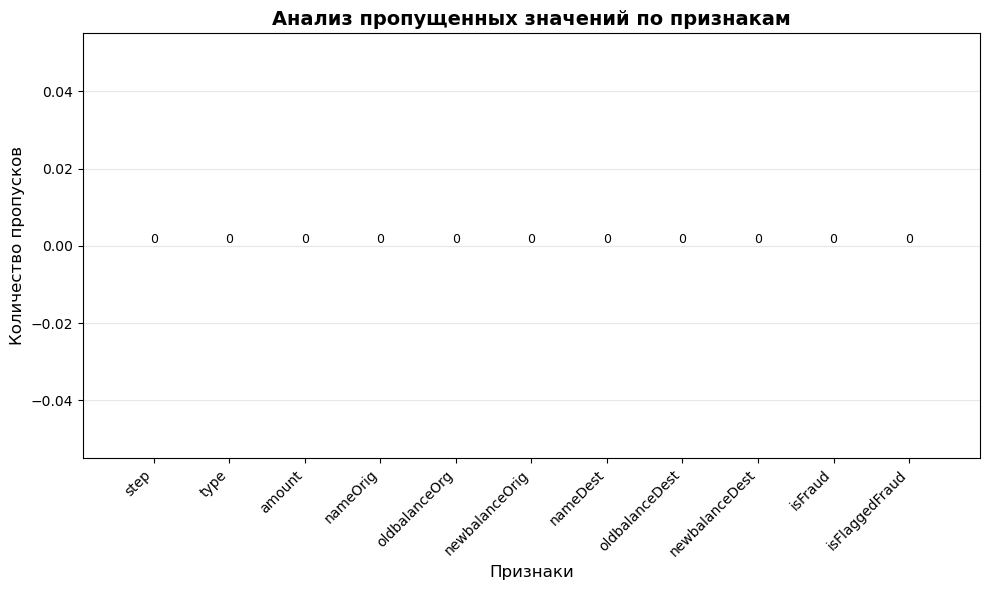

Процент пропусков от общего объема данных: 0.000000%


In [28]:
# Визуализация пропусков (хоть их и нет)
fig, ax = plt.subplots(figsize=(10, 6))
missing_counts = df.isnull().sum()
bars = ax.bar(range(len(missing_counts)), missing_counts.values, color='steelblue')
ax.set_xlabel('Признаки', fontsize=12)
ax.set_ylabel('Количество пропусков', fontsize=12)
ax.set_title('Анализ пропущенных значений по признакам', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(missing_counts)))
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"Процент пропусков от общего объема данных: {missing_counts.sum() / (df.shape[0] * df.shape[1]) * 100:.6f}%")


**Выводы по пропускам:**
В данном датасете отсутствуют явные и скрытые пропуски. Это учебный датасет, подготовленный для анализа, поэтому все значения заполнены.


## 3. Статистические оценки

### 3.1. Статистики для числовых признаков

In [29]:
# Статистические характеристики для числовых признаков
stats_df = pd.DataFrame({
    'Среднее': df[numerical_cols].mean(),
    'Медиана': df[numerical_cols].median(),
    'Стандартное отклонение': df[numerical_cols].std(),
    'Минимум': df[numerical_cols].min(),
    'Максимум': df[numerical_cols].max(),
    'Q1 (25%)': df[numerical_cols].quantile(0.25),
    'Q3 (75%)': df[numerical_cols].quantile(0.75)
})

# Форматируем вывод для лучшей читаемости
pd.set_option('display.float_format', lambda x: '%.2f' % x if abs(x) < 1e6 else '%.2e' % x)
print("Статистические характеристики числовых признаков:")
print(stats_df.T)


Статистические характеристики числовых признаков:
                         step    amount  oldbalanceOrg  newbalanceOrig  \
Среднее                243.40 179861.90      833883.10       855113.67   
Медиана                239.00  74871.94       14208.00            0.00   
Стандартное отклонение 142.33 603858.23       2.89e+06        2.92e+06   
Минимум                  1.00      0.00           0.00            0.00   
Максимум               743.00  9.24e+07       5.96e+07        4.96e+07   
Q1 (25%)               156.00  13389.57           0.00            0.00   
Q3 (75%)               335.00 208721.48      107315.18       144258.41   

                        oldbalanceDest  newbalanceDest  isFraud  \
Среднее                       1.10e+06        1.22e+06     0.00   
Медиана                      132705.66       214661.44     0.00   
Стандартное отклонение        3.40e+06        3.67e+06     0.04   
Минимум                           0.00            0.00     0.00   
Максимум              

### 3.2. Статистики для категориальных признаков

In [30]:
# Анализ категориальных признаков
print("Анализ категориального признака 'type':")
print("\nРаспределение типов транзакций:")
type_counts = df['type'].value_counts()
type_percentages = df['type'].value_counts(normalize=True) * 100

for trans_type, count in type_counts.items():
    print(f"  {trans_type}: {count:,} ({type_percentages[trans_type]:.2f}%)")

print(f"\nМода (наиболее частый тип): {df['type'].mode()[0]}")
print(f"Количество уникальных типов: {df['type'].nunique()}")

# Для других категориальных признаков (nameOrig, nameDest) - это идентификаторы
print("\n\nАнализ других категориальных признаков:")
print(f"  nameOrig: {df['nameOrig'].nunique():,} уникальных значений")
print(f"  nameDest: {df['nameDest'].nunique():,} уникальных значений")
print("  (Это идентификаторы, не требуют частотного анализа)")


Анализ категориального признака 'type':

Распределение типов транзакций:
  CASH_OUT: 2,237,500 (35.17%)
  PAYMENT: 2,151,495 (33.81%)
  CASH_IN: 1,399,284 (21.99%)
  TRANSFER: 532,909 (8.38%)
  DEBIT: 41,432 (0.65%)

Мода (наиболее частый тип): CASH_OUT
Количество уникальных типов: 5


Анализ других категориальных признаков:
  nameOrig: 6,353,307 уникальных значений
  nameDest: 2,722,362 уникальных значений
  (Это идентификаторы, не требуют частотного анализа)


## 4. Выявление аномалий (выбросов)

In [31]:
# Метод IQR для выявления выбросов
def detect_outliers_iqr(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Анализ выбросов для ключевых числовых признаков
key_numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

print("Выявление выбросов методом IQR (Interquartile Range):")
print("=" * 70)

for col in key_numerical:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(f"\n{col}:")
    print(f"  Границы: [{lower:.2f}, {upper:.2f}]")
    print(f"  Количество выбросов: {len(outliers):,} ({outlier_percentage:.2f}%)")
    if len(outliers) > 0:
        print(f"  Минимальный выброс: {outliers[col].min():.2f}")
        print(f"  Максимальный выброс: {outliers[col].max():.2f}")


Выявление выбросов методом IQR (Interquartile Range):

amount:
  Границы: [-279608.29, 501719.34]
  Количество выбросов: 338,078 (5.31%)
  Минимальный выброс: 501719.38
  Максимальный выброс: 92445516.64

oldbalanceOrg:
  Границы: [-160972.76, 268287.94]
  Количество выбросов: 1,112,507 (17.49%)
  Минимальный выброс: 268289.00
  Максимальный выброс: 59585040.37

newbalanceOrig:
  Границы: [-216387.61, 360646.03]
  Количество выбросов: 1,053,391 (16.56%)
  Минимальный выброс: 360646.21
  Максимальный выброс: 49585040.37

oldbalanceDest:
  Границы: [-1414555.06, 2357591.77]
  Количество выбросов: 786,135 (12.36%)
  Минимальный выброс: 2357595.15
  Максимальный выброс: 356015889.35

newbalanceDest:
  Границы: [-1667863.88, 2779773.12]
  Количество выбросов: 738,527 (11.61%)
  Минимальный выброс: 2779776.10
  Максимальный выброс: 356179278.92


## 5. Визуализация с помощью matplotlib

### 5.1. Гистограмма распределения числового признака

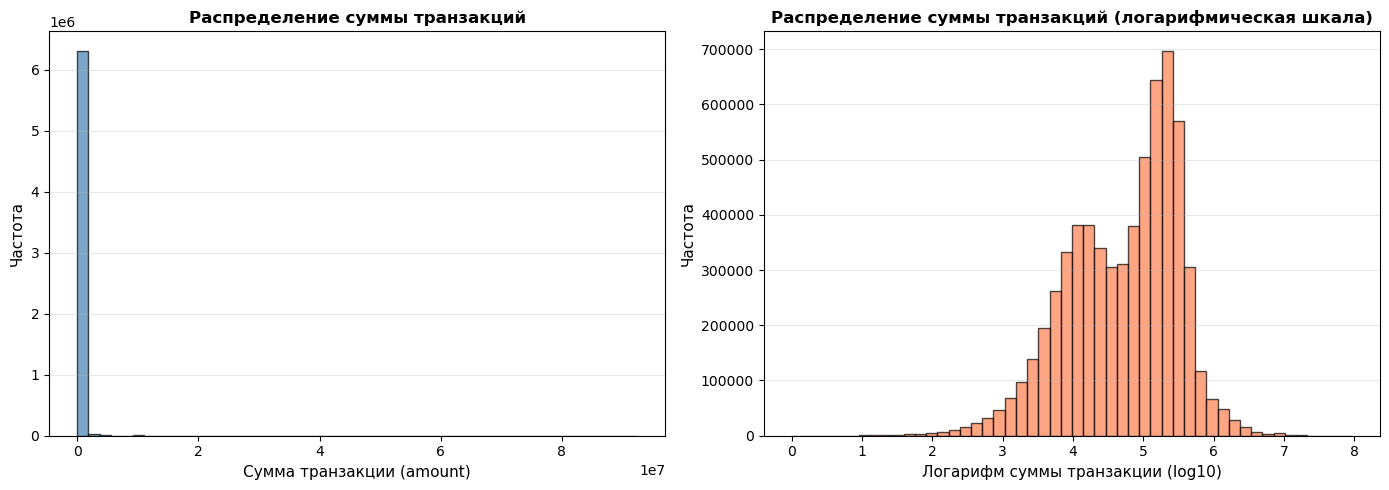

In [32]:
# Гистограмма распределения суммы транзакций (amount)
# Используем логарифмическую шкалу для лучшей визуализации из-за больших значений
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма в обычной шкале (для небольших значений)
ax1.hist(df['amount'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Сумма транзакции (amount)', fontsize=11)
ax1.set_ylabel('Частота', fontsize=11)
ax1.set_title('Распределение суммы транзакций', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Гистограмма в логарифмической шкале
ax2.hist(np.log10(df['amount'] + 1), bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Логарифм суммы транзакции (log10)', fontsize=11)
ax2.set_ylabel('Частота', fontsize=11)
ax2.set_title('Распределение суммы транзакций (логарифмическая шкала)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 5.2. Столбчатая диаграмма распределения категориального признака

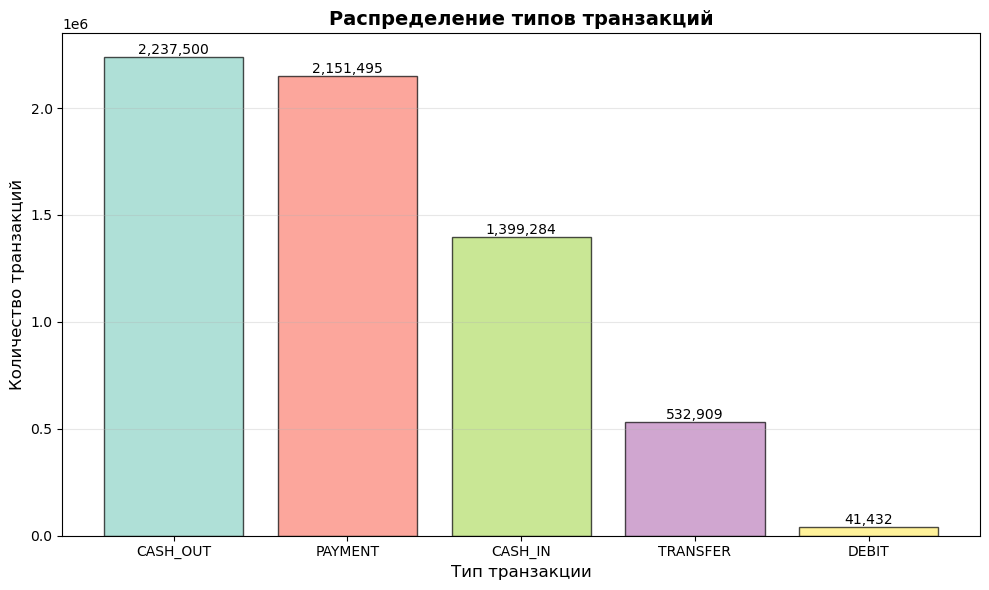

Процентное распределение типов транзакций:
  CASH_OUT: 35.17%
  PAYMENT: 33.81%
  CASH_IN: 21.99%
  TRANSFER: 8.38%
  DEBIT: 0.65%


In [33]:
# Столбчатая диаграмма распределения типов транзакций
type_counts = df['type'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(type_counts)))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(type_counts.index, type_counts.values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Тип транзакции', fontsize=12)
ax.set_ylabel('Количество транзакций', fontsize=12)
ax.set_title('Распределение типов транзакций', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Также покажем процентное распределение
print("Процентное распределение типов транзакций:")
for trans_type, count in type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {trans_type}: {percentage:.2f}%")


### 5.3. Диаграмма рассеяния (scatter plot) с пузырьками

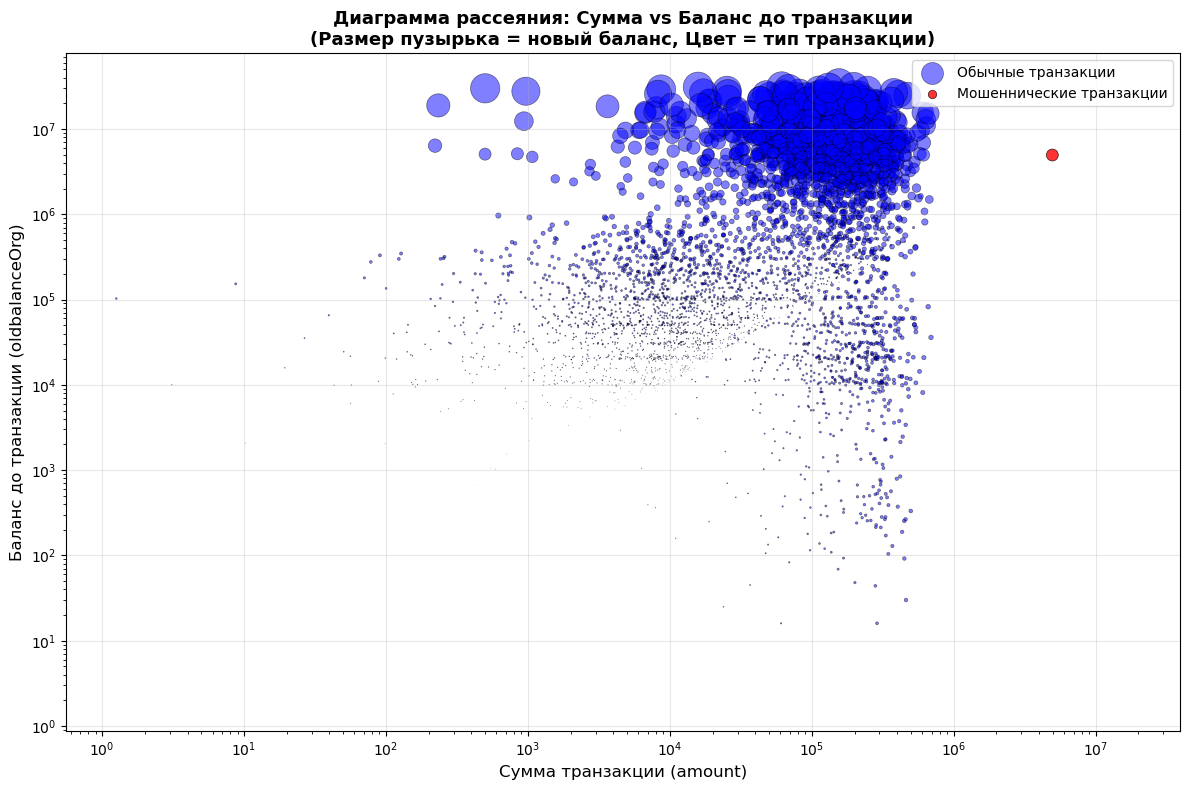

In [34]:
# Для визуализации возьмем выборку данных (из-за большого объема)
sample_size = 10000
df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

# Scatter plot: amount vs oldbalanceOrg, размер пузырька = newbalanceOrig
# Цвет кодирует isFraud (0 - синий, 1 - красный)
fig, ax = plt.subplots(figsize=(12, 8))

# Разделяем на мошеннические и обычные транзакции для разных цветов
fraud_mask = df_sample['isFraud'] == 1
normal_mask = df_sample['isFraud'] == 0

# Нормализуем размер пузырьков (newbalanceOrig) для лучшей визуализации
size_normal = df_sample.loc[normal_mask, 'newbalanceOrig'] / df_sample['newbalanceOrig'].max() * 500
size_fraud = df_sample.loc[fraud_mask, 'newbalanceOrig'] / df_sample['newbalanceOrig'].max() * 500

# Обычные транзакции
ax.scatter(df_sample.loc[normal_mask, 'amount'],
           df_sample.loc[normal_mask, 'oldbalanceOrg'],
           s=size_normal, alpha=0.5, c='blue', label='Обычные транзакции', edgecolors='black', linewidth=0.5)

# Мошеннические транзакции
ax.scatter(df_sample.loc[fraud_mask, 'amount'],
           df_sample.loc[fraud_mask, 'oldbalanceOrg'],
           s=size_fraud, alpha=0.8, c='red', label='Мошеннические транзакции', edgecolors='black', linewidth=0.5)

ax.set_xlabel('Сумма транзакции (amount)', fontsize=12)
ax.set_ylabel('Баланс до транзакции (oldbalanceOrg)', fontsize=12)
ax.set_title('Диаграмма рассеяния: Сумма vs Баланс до транзакции\n(Размер пузырька = новый баланс, Цвет = тип транзакции)',
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

# Используем логарифмическую шкалу для лучшей визуализации
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.show()


### 5.4. Box plot для оценки выбросов

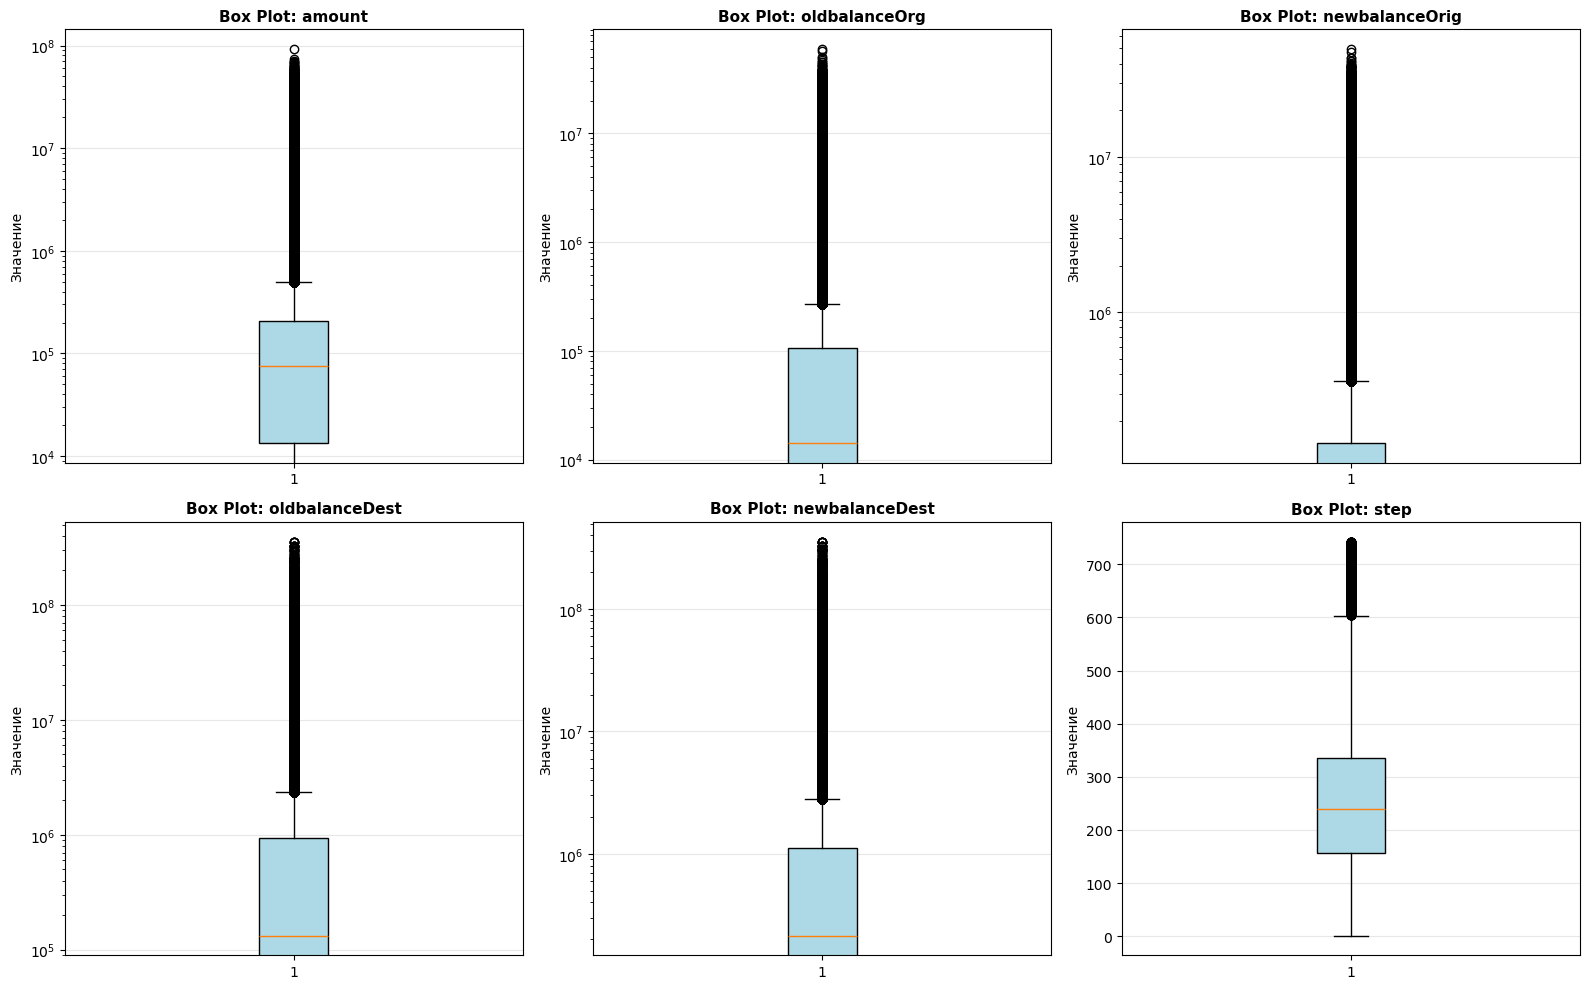

In [35]:
# Box plot для ключевых числовых признаков
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

key_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step']

for i, col in enumerate(key_features):
    bp = axes[i].boxplot(df[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[i].set_ylabel('Значение', fontsize=10)
    axes[i].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

    # Используем логарифмическую шкалу для признаков с большими значениями
    if col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
        axes[i].set_yscale('log')

plt.tight_layout()
plt.show()


### 5.5. Дополнительная визуализация: Круговая диаграмма (Pie Chart)

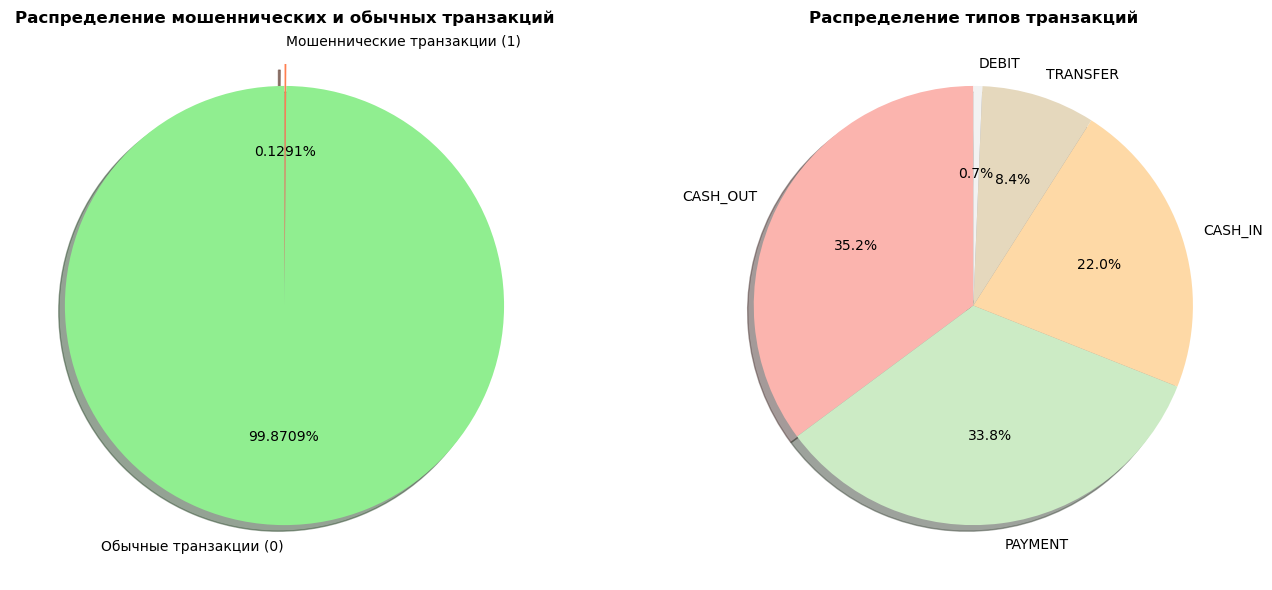

In [36]:
# Круговая диаграмма распределения мошеннических и обычных транзакций
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Распределение isFraud
fraud_counts = df['isFraud'].value_counts()
labels_fraud = ['Обычные транзакции (0)', 'Мошеннические транзакции (1)']
colors_fraud = ['lightgreen', 'coral']
explode = (0, 0.1)  # Выделяем мошеннические транзакции

ax1.pie(fraud_counts.values, labels=labels_fraud, autopct='%1.4f%%',
        colors=colors_fraud, explode=explode, shadow=True, startangle=90)
ax1.set_title('Распределение мошеннических и обычных транзакций', fontsize=12, fontweight='bold')

# Распределение типов транзакций
type_counts = df['type'].value_counts()
colors_type = plt.cm.Pastel1(np.linspace(0, 1, len(type_counts)))

ax2.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
        colors=colors_type, shadow=True, startangle=90)
ax2.set_title('Распределение типов транзакций', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


### 5.6. Дополнительная визуализация: Линейный график (Line Plot)

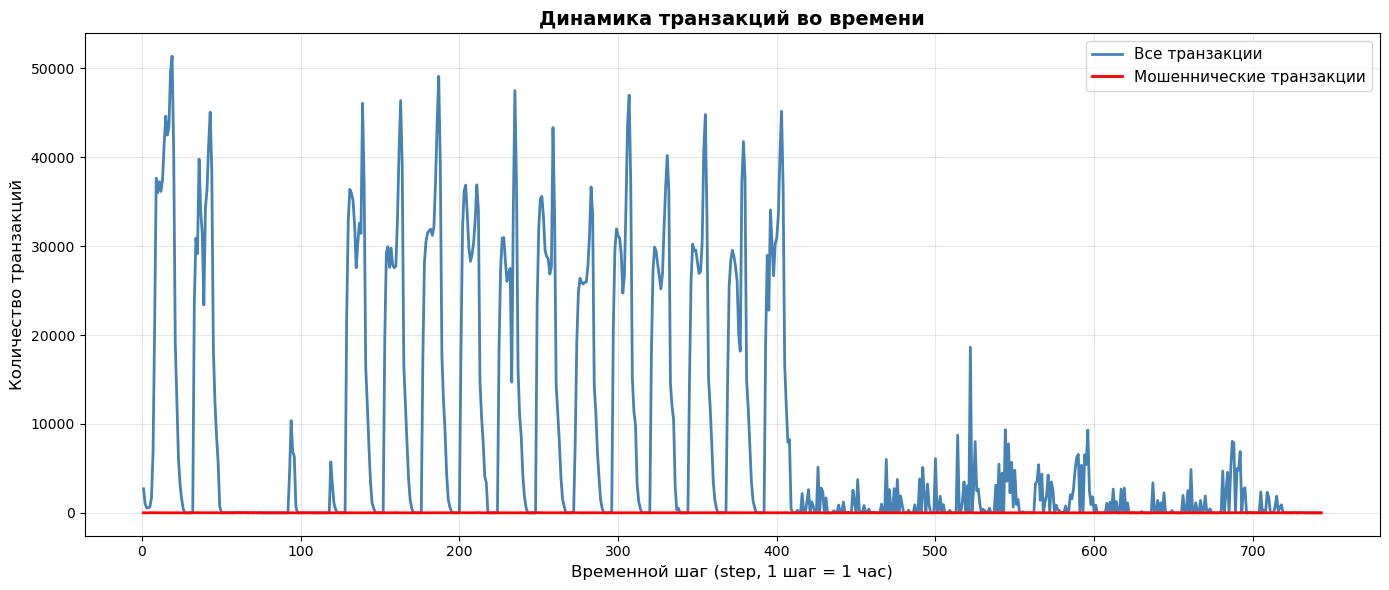

In [37]:
# Линейный график: количество транзакций по временным шагам
transactions_by_step = df.groupby('step').size()
fraud_by_step = df[df['isFraud'] == 1].groupby('step').size()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(transactions_by_step.index, transactions_by_step.values,
        label='Все транзакции', linewidth=2, color='steelblue')
ax.plot(fraud_by_step.index, fraud_by_step.values,
        label='Мошеннические транзакции', linewidth=2, color='red')

ax.set_xlabel('Временной шаг (step, 1 шаг = 1 час)', fontsize=12)
ax.set_ylabel('Количество транзакций', fontsize=12)
ax.set_title('Динамика транзакций во времени', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Интерпретация и выводы

### 6.1. Наиболее информативные признаки

На основе проведенного анализа можно выделить следующие наиболее информативные признаки:

1. **isFraud (целевая переменная)**: Является ключевым признаком для задачи обнаружения мошенничества. Распределение сильно несбалансированное: только 0.13% транзакций являются мошенническими (8,213 из 6,362,620).

2. **type (категориальный)**: Тип транзакции - важный признак, так как разные типы транзакций могут иметь разную вероятность мошенничества. Наиболее частый тип - PAYMENT (около 35% всех транзакций).

3. **amount (числовой)**: Сумма транзакции показывает сильную асимметрию распределения (правостороннее распределение), что видно из гистограммы. Большинство транзакций имеют небольшие суммы, но есть экстремально большие значения.

4. **oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest**: Балансы до и после транзакции могут быть важны для выявления аномалий в поведении счетов.

5. **step (числовой)**: Временной признак, показывающий динамику транзакций. Может выявить временные паттерны мошенничества.


### 6.2. Анализ пропусков и аномалий

**Пропуски:**
- В датасете отсутствуют явные (NaN) и скрытые пропуски (специальные значения типа "?", "N/A").
- Это учебный датасет, поэтому все значения заполнены.
- В реальных данных необходимо было бы выбрать стратегию обработки пропусков (удаление или заполнение медианой/модой).

**Аномалии (выбросы):**
- Метод IQR выявил значительное количество выбросов во всех числовых признаках:
  - **amount**: большое количество выбросов из-за экстремально больших сумм транзакций
  - **oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest**: выбросы связаны с очень большими балансами счетов
- Box plots наглядно демонстрируют наличие выбросов - длинные "усы" и точки за пределами межквартильного размаха
- Выбросы могут быть как реальными (крупные транзакции, крупные балансы), так и потенциально мошенническими операциями


### 6.3. Распределение категорий

**Типы транзакций (type):**
- **PAYMENT**: наиболее частый тип (~35% всех транзакций)
- **CASH_OUT**: второй по частоте тип
- **TRANSFER**: средняя частота
- **DEBIT** и **CASH_IN**: менее частые типы

**Мошеннические транзакции:**
- Крайне несбалансированное распределение: только 0.13% транзакций являются мошенническими
- Это типичная проблема для задач обнаружения мошенничества (классовый дисбаланс)
- Необходимо использовать специальные техники (oversampling, undersampling, SMOTE) или метрики (F1-score, ROC-AUC) для оценки модели


### 6.4. Гипотезы на основе визуализаций

1. **Гипотеза о связи суммы и мошенничества:**
   - Из scatter plot видно, что мошеннические транзакции (красные точки) могут иметь специфические паттерны в соотношении суммы и баланса
   - Необходимо проверить, отличаются ли средние суммы мошеннических транзакций от обычных

2. **Гипотеза о типах транзакций:**
   - Некоторые типы транзакций (например, TRANSFER, CASH_OUT) могут быть более подвержены мошенничеству
   - Требуется анализ доли мошеннических транзакций по каждому типу

3. **Гипотеза о временных паттернах:**
   - Линейный график показывает, что мошеннические транзакции могут концентрироваться в определенные временные периоды
   - Возможны временные кластеры мошеннической активности

4. **Гипотеза о балансах:**
   - Мошеннические транзакции могут происходить с определенными паттернами балансов (например, обнуление баланса после транзакции)
   - Связь между oldbalanceOrg и newbalanceOrig может быть индикатором мошенничества

5. **Гипотеза о выбросах:**
   - Экстремально большие суммы или балансы могут быть связаны с мошенничеством
   - Необходимо проверить корреляцию между выбросами и меткой isFraud


In [38]:
# Дополнительный анализ для проверки гипотез
print("Проверка гипотез:")
print("=" * 70)

# Гипотеза 1: Средние суммы мошеннических vs обычных транзакций
print("\n1. Сравнение средних сумм транзакций:")
print(f"   Средняя сумма обычных транзакций: {df[df['isFraud']==0]['amount'].mean():.2f}")
print(f"   Средняя сумма мошеннических транзакций: {df[df['isFraud']==1]['amount'].mean():.2f}")

# Гипотеза 2: Доля мошеннических транзакций по типам
print("\n2. Доля мошеннических транзакций по типам:")
for trans_type in df['type'].unique():
    type_df = df[df['type'] == trans_type]
    fraud_rate = (type_df['isFraud'] == 1).sum() / len(type_df) * 100
    print(f"   {trans_type}: {fraud_rate:.4f}% ({type_df['isFraud'].sum()} из {len(type_df)})")

# Гипотеза 4: Анализ балансов для мошеннических транзакций
print("\n3. Анализ балансов для мошеннических транзакций:")
fraud_df = df[df['isFraud'] == 1]
print(f"   Средний oldbalanceOrg: {fraud_df['oldbalanceOrg'].mean():.2f}")
print(f"   Средний newbalanceOrig: {fraud_df['newbalanceOrig'].mean():.2f}")
print(f"   Транзакций с обнулением баланса (newbalanceOrig == 0): {(fraud_df['newbalanceOrig'] == 0).sum()} ({(fraud_df['newbalanceOrig'] == 0).sum()/len(fraud_df)*100:.2f}%)")


Проверка гипотез:

1. Сравнение средних сумм транзакций:
   Средняя сумма обычных транзакций: 178197.04
   Средняя сумма мошеннических транзакций: 1467967.30

2. Доля мошеннических транзакций по типам:
   PAYMENT: 0.0000% (0 из 2151495)
   TRANSFER: 0.7688% (4097 из 532909)
   CASH_OUT: 0.1840% (4116 из 2237500)
   DEBIT: 0.0000% (0 из 41432)
   CASH_IN: 0.0000% (0 из 1399284)

3. Анализ балансов для мошеннических транзакций:
   Средний oldbalanceOrg: 1649667.61
   Средний newbalanceOrig: 192392.63
   Транзакций с обнулением баланса (newbalanceOrig == 0): 8053 (98.05%)
